<a href="https://colab.research.google.com/github/leiyi-ihb/ColabPractics/blob/main/Keras_example01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! if [ ! -f "dataset_Li.pkl" ]; then wget https://master.dl.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl ; else echo "Found previous downloaded data."; fi

--2022-10-28 18:17:49--  https://master.dl.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl
Resolving master.dl.sourceforge.net (master.dl.sourceforge.net)... 216.105.38.12
Connecting to master.dl.sourceforge.net (master.dl.sourceforge.net)|216.105.38.12|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl [following]
--2022-10-28 18:17:49--  https://downloads.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Connecting to downloads.sourceforge.net (downloads.sourceforge.net)|204.68.111.105|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://versaweb.dl.sourceforge.net/project/summer-research-20/sim_data_1/dataset_Li.pkl [following]
--2022-10-28 18:17:49--  https://versaweb.dl.sourceforge.net/project/summer-re

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPooling1D, GlobalMaxPooling1D, Conv1D

In [3]:
import pickle
with open("dataset_Li.pkl", "rb") as f:
    data = pickle.load(f)

# data is a Python dictionary with keys 'train', 'val', 'test'
print(type(data), data.keys())
# train has N=16000 datapoints for training the model
print('train', data['train'][0].shape, data['train'][1].shape)
# val has N=2000 datapoints for training the model
print('val', data['val'][0].shape, data['val'][1].shape)
# test has N=2000 datapoints for training the model
print('test', data['test'][0].shape, data['test'][1].shape)

<class 'dict'> dict_keys(['train', 'val', 'test'])
train (16000, 1000, 4) (16000, 1)
val (2000, 1000, 4) (2000, 1)
test (2000, 1000, 4) (2000, 1)


In [10]:
x_train, y_train = np.array(data['train'][0]), np.array(data['train'][1])
x_test, y_test = np.array(data['test'][0]), np.array(data['test'][1])
# print(x_train)
# print(y_train)

In [15]:
# First
model = Sequential()
model.add(Conv1D(32, kernel_size=(20), activation='relu', input_shape=(1000, 4)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())
print({i: v for i, v in enumerate(model.layers)})
# compile
model.compile(optimizer='rmsprop',
             metrics = ['acc'],
             loss = 'binary_crossentropy')
# training
model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 10,
                   validation_split = 0.2)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 981, 32)           2592      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 245, 32)          0         
 1D)                                                             
                                                                 
 global_max_pooling1d_6 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2,627
Trainable params: 2,627
Non-traina

In [16]:
from keras.layers import Dropout
# Second

model = Sequential()
model.add(Conv1D(32, kernel_size=(20), activation='relu', input_shape=(1000, 4)))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(4)))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())
print({i: v for i, v in enumerate(model.layers)})
# compile
model.compile(optimizer='rmsprop',
             metrics = ['acc'],
             loss = 'binary_crossentropy')
# training
model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 10,
                   validation_split = 0.2)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 981, 32)           2592      
                                                                 
 dropout (Dropout)           (None, 981, 32)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 245, 32)          0         
 1D)                                                             
                                                                 
 global_max_pooling1d_7 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
 dense_15 (Dense)            (None, 1)                

In [17]:
# Thired

model = Sequential()
model.add(Conv1D(32, kernel_size=(20), activation='relu', input_shape=(1000, 4)))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())
print({i: v for i, v in enumerate(model.layers)})
# compile
model.compile(optimizer='rmsprop',
             metrics = ['acc'],
             loss = 'binary_crossentropy')
# training
model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 10,
                   validation_split = 0.2)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 981, 32)           2592      
                                                                 
 global_max_pooling1d_8 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2,627
Trainable params: 2,627
Non-trainable params: 0
_________________________________________________________________
None
{0: <keras.layers.convolutional.conv1d.Conv1D object at 0x7f98d3e32090>, 1: <keras.layers.pooling.global_max_pool

In [20]:
# Thired

model = Sequential()
model.add(Conv1D(32, kernel_size=(20), activation='relu', input_shape=(1000, 4)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())
print({i: v for i, v in enumerate(model.layers)})
# compile
model.compile(optimizer='rmsprop',
             metrics = ['acc'],
             loss = 'binary_crossentropy')
# training
model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 10,
                   validation_split = 0.2)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 981, 32)           2592      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 245, 32)          0         
 g1D)                                                            
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 61, 32)           0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_11 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                     

In [21]:
# Fiveth
model = Sequential()
model.add(Conv1D(32, kernel_size=(20), activation='relu', input_shape=(1000, 4)))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation="sigmoid"))
print(model.summary())
print({i: v for i, v in enumerate(model.layers)})
# compile
model.compile(optimizer='rmsprop',
             metrics = ['acc'],
             loss = 'binary_crossentropy')
# training
model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 10,
                   validation_split = 0.2)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 981, 32)           2592      
                                                                 
 global_max_pooling1d_12 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________
None
{0: <keras.layers.convolutional.conv1d.Conv1D object at 0x7f98d438b850>, 1: <keras.layers.pooling.global_max_pooling1d.GlobalMaxPooling1D object at 0x7f98d438bd90>, 2: <keras.layers.core.dense.Dense object at 0x7f98d4445b10>}
Epoch 1/10
1280/12

In [36]:
# Sixth: take more time
from keras.layers import LSTM, AveragePooling1D, Conv2D, LocallyConnected1D
model = Sequential()
model.add(Conv1D(32, kernel_size=(20), activation='relu', input_shape=(1000, 4)))
model.add(Conv1D(16, kernel_size=(20), activation='relu'))
model.add(LocallyConnected1D(32, 3))
model.add(MaxPooling1D(pool_size=(4)))
model.add(AveragePooling1D(pool_size=(4)))
model.add(GlobalMaxPooling1D())
# model.add(LSTM())
model.add(Dense(1, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())
print({i: v for i, v in enumerate(model.layers)})
# compile
model.compile(optimizer='rmsprop',
             metrics = ['acc'],
             loss = 'binary_crossentropy')
# training
History = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 10,
                   validation_split = 0.2)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 981, 32)           2592      
                                                                 
 conv1d_30 (Conv1D)          (None, 962, 16)           10256     
                                                                 
 locally_connected1d_1 (Loca  (None, 960, 32)          1505280   
 llyConnected1D)                                                 
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 240, 32)          0         
 g1D)                                                            
                                                                 
 average_pooling1d_3 (Averag  (None, 60, 32)           0         
 ePooling1D)                                                     
                                                     

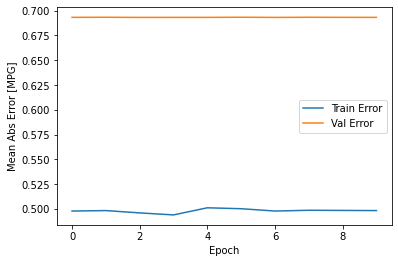

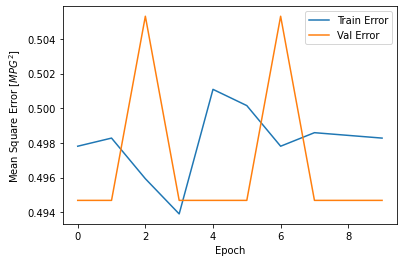

In [38]:
import matplotlib.pyplot as plt
def plot_history(history):
    
#   hist = pd.DataFrame(history.history)
    hist = History.history
    hist['epoch'] = History.epoch
 
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['acc'], # need to be modified
        label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], # need to be modified
        label = 'Val Error')
#     plt.ylim([0,5])
    plt.legend()
 
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['acc'], # need to be modified
        label='Train Error')
    plt.plot(hist['epoch'], hist['val_acc'], # need to be modified
        label = 'Val Error')
#     plt.ylim([0,20])
    plt.legend()
    plt.show()
 
if __name__=='__main__':
  plot_history(History)


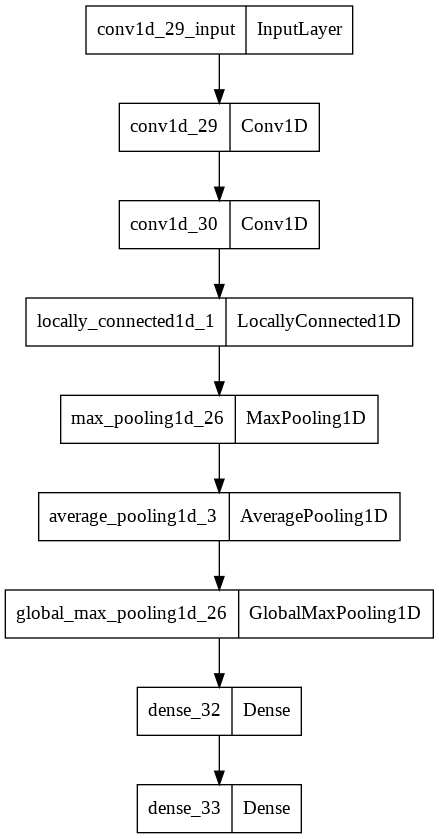

In [40]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
from tensorflow.python import metrics
# Seventh

model = Sequential()
model.add(Conv1D(32, kernel_size=(20), activation='relu', input_shape=(1000, 4)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())
print({i: v for i, v in enumerate(model.layers)})
# compile
model.compile(optimizer='rmsprop',
             metrics = ['acc'],
             loss = 'binary_crossentropy'
             )
# training
model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 10,
                   validation_split = 0.2)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)